In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta

In [2]:
df=pd.read_csv("messi.csv")

In [3]:
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,5/1/05,H,FC Barcelona,Albacete Balompie,2:0,CF,90+1,2:0,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11/2/05,H,FC Barcelona,Panathinaikos Athens,5:0,RW,34,3:0,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:1,RW,51,2:0,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:1,RW,50,2:1,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:0,CF,82,2:0,Left-footed shot,Ronaldinho Gaacho
5,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:3,CF,75,0:2,Right-footed shot,Sylvinho
6,05/06,LaLiga,21,1/29/06,A,FC Barcelona,RCD Mallorca,0:3,CF,83,0:3,Left-footed shot,Ronaldinho Gaacho
7,05/06,Copa del Rey,Quarter-Finals,2/1/06,H,FC Barcelona,Real Zaragoza,2:1,CF,42,1:0,Header,Ludovic Giuly
8,05/06,LaLiga,24,2/18/06,H,FC Barcelona,Real Betis Balompie,5:1,RW,84,5:1,Left-footed shot,NaN
9,06/07,LaLiga,1,8/28/06,A,FC Barcelona,Celta de Vigo,2:3,LW,59,1:2,Left-footed shot,Andres Iniesta


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 13 columns):
Season              686 non-null object
Competition         686 non-null object
Matchday            686 non-null object
Date                686 non-null object
Venue               686 non-null object
Club                686 non-null object
Opponent            686 non-null object
Result              686 non-null object
Playing_Position    686 non-null object
Minute              686 non-null object
At_score            686 non-null object
Type                685 non-null object
Goal_assist         476 non-null object
dtypes: object(13)
memory usage: 69.8+ KB


In [5]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,18
Competition,8
Matchday,48
Date,441
Venue,2
Club,2
Opponent,89
Result,46
Playing_Position,9
Minute,99


In [6]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

In [7]:
df.describe(include=['object'])

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,686,686,686,686,686,686,686,686,686,686,686,685,476
unique,18,8,48,441,2,2,89,46,9,99,38,13,65
top,11/12,LaLiga,Group Stage,3/7/12,H,FC Barcelona,Sevilla FC,4:0,CF,87,1:0,Left-footed shot,Luis Suarez
freq,73,474,76,5,411,672,38,46,269,13,97,424,48


In [8]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,474
UEFA Champions League,125
Copa del Rey,56
Supercopa,14
Ligue 1,8
FIFA Club World Cup,5
UEFA Super Cup,3
Trophée des Champions,1


<AxesSubplot:title={'center':'Goals Per Competition'}, xlabel='Count', ylabel='Competition'>

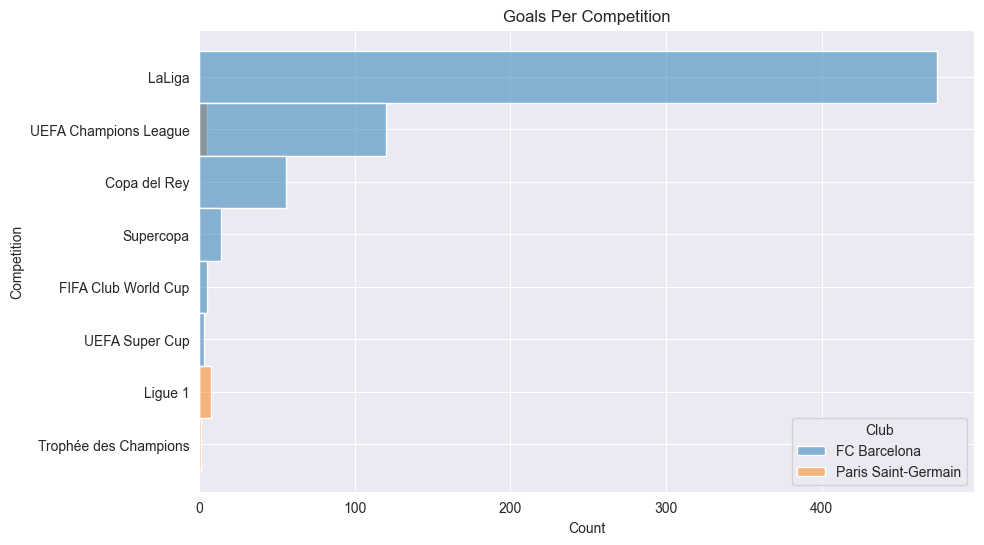

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Goals Per Competition')
sns.set_style("darkgrid")
sns.histplot(df,y='Competition',hue='Club')

In [11]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,474
UEFA Champions League,125
Copa del Rey,56
Supercopa,14
Ligue 1,8
FIFA Club World Cup,5
UEFA Super Cup,3
Trophée des Champions,1


<AxesSubplot:title={'center':'Goals Per Season'}, xlabel='Count', ylabel='Season'>

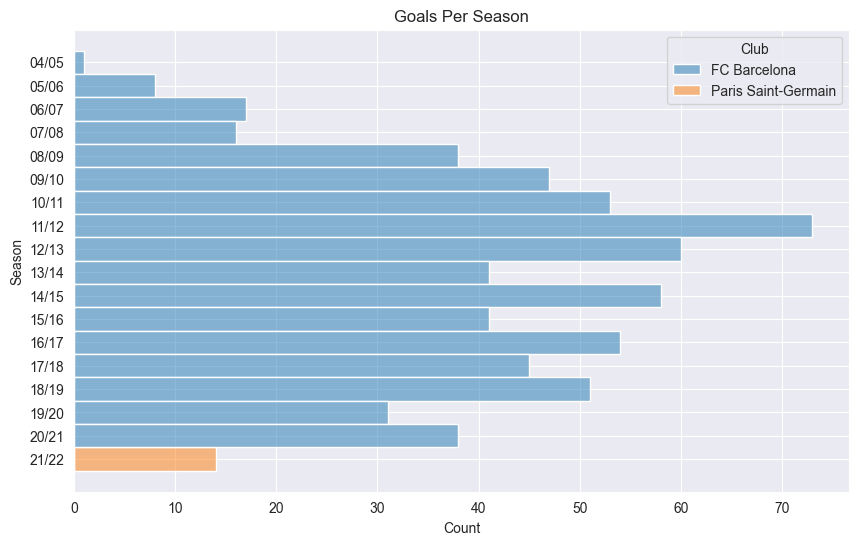

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Goals Per Season')
sns.set_style("darkgrid")
sns.histplot(df,y='Season',hue='Club')

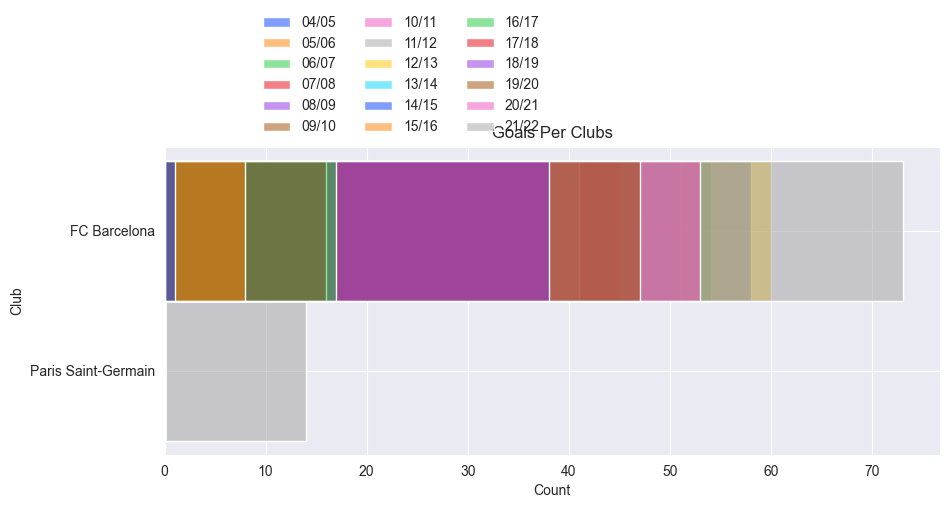

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals Per Clubs')
sns.set_style("darkgrid")
sns.histplot(df,y='Club',hue='Season',palette="bright")
sns.move_legend(
    ax, "lower right",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

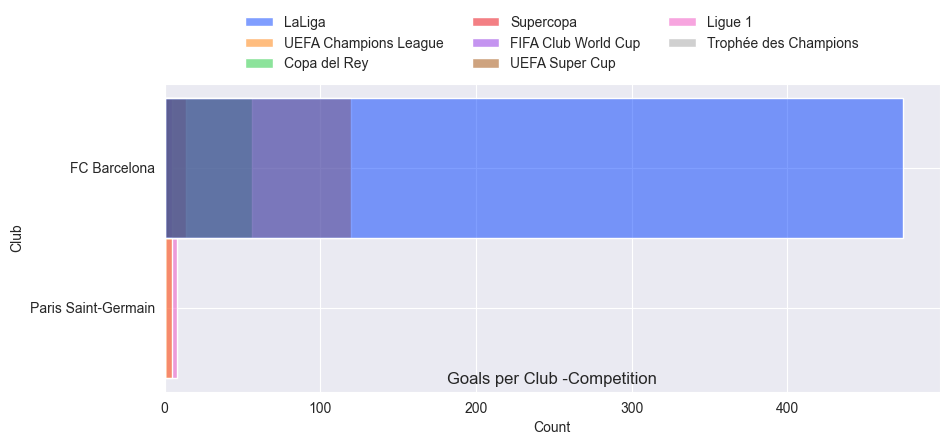

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Club -Competition', y=-0.001)
sns.set_style("darkgrid")
sns.histplot(df,y='Club',hue='Competition',palette="bright")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

In [15]:
df.Playing_Position.unique()

array(['CF', 'RW', 'LW', 'SS', 'CF ', 'AM', 'RW ', 'AM ', 'SS '],
      dtype=object)

In [16]:
df.loc[(df.Playing_Position =='CF '), 'Playing_Position'] = 'CF'
df.loc[(df.Playing_Position =='RW '), 'Playing_Position'] = 'RW'
df.loc[(df.Playing_Position =='AM '), 'Playing_Position'] = 'AM'
df.loc[(df.Playing_Position =='SS '), 'Playing_Position'] = 'SS'


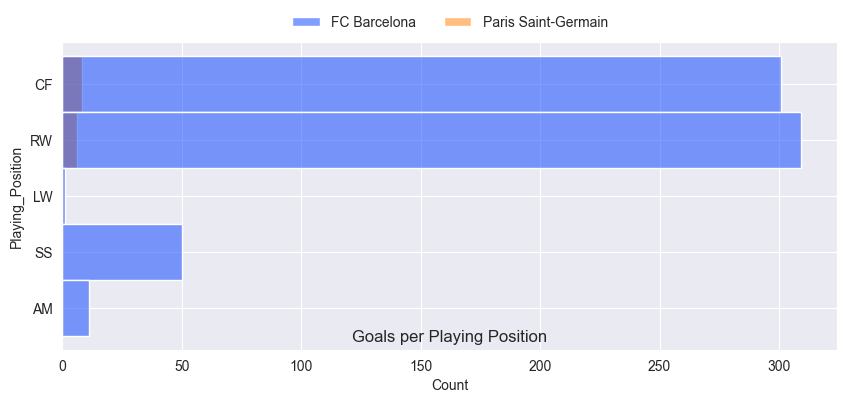

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Playing Position', y=-0.001)
sns.set_style("darkgrid")
sns.histplot(df,y='Playing_Position',hue='Club',palette="bright")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

In [18]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:46]
mins2=mins[46:92]
mins3 = mins[92:]


C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals per Game in 1st half')

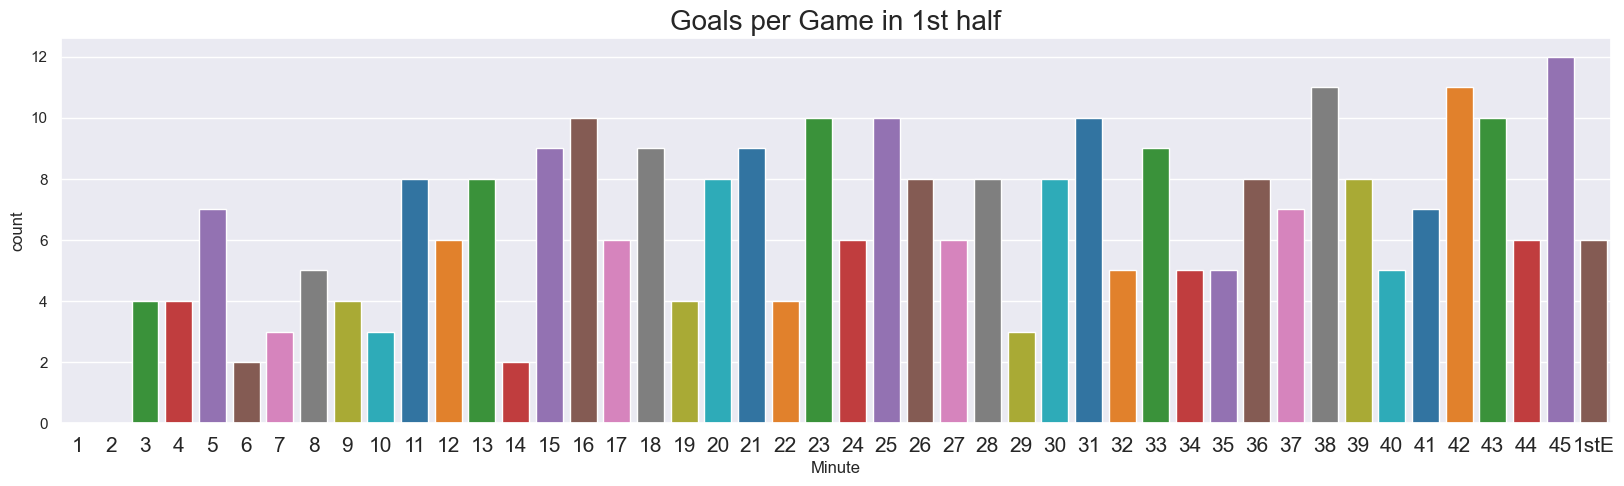

In [19]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
sns.set_style("darkgrid")
p=sns.countplot(df['Minute'],order=mins1,palette='tab10')
p.axes.set_title("Goals per Game in 1st half",fontsize=20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals per Game Minute in 2nd half')

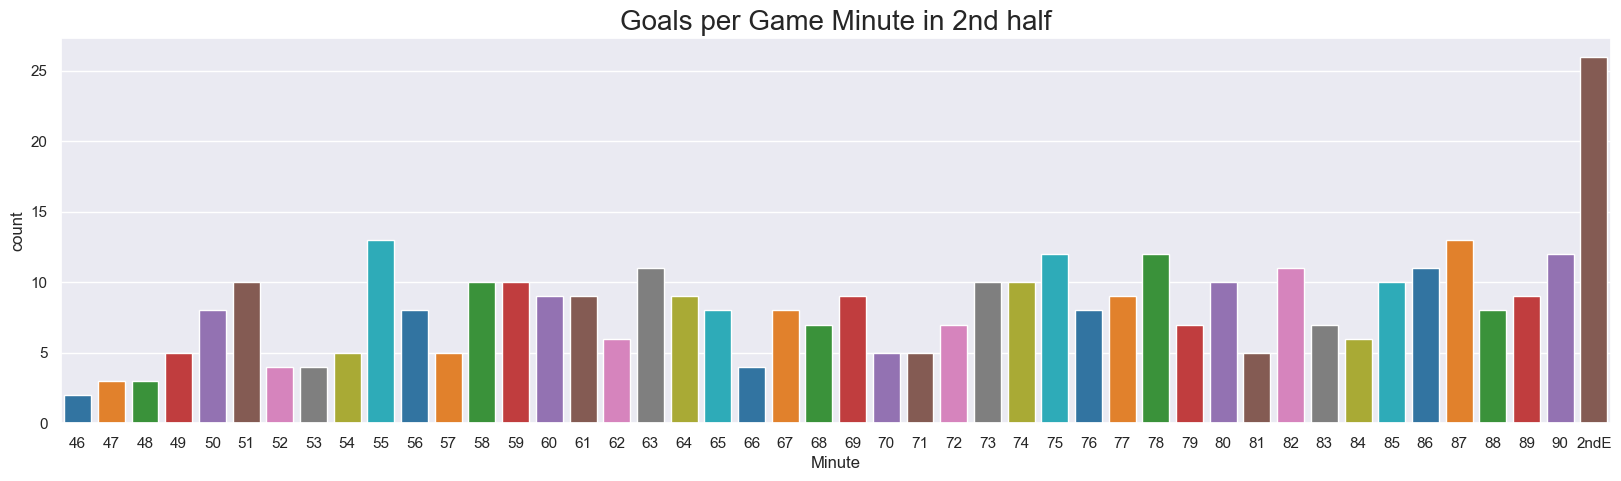

In [20]:
p=sns.countplot(df['Minute'],order=mins2,palette ='tab10')
p.axes.set_title("Goals per Game Minute in 2nd half",fontsize=20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals per Game Minute (91-Extra times)')

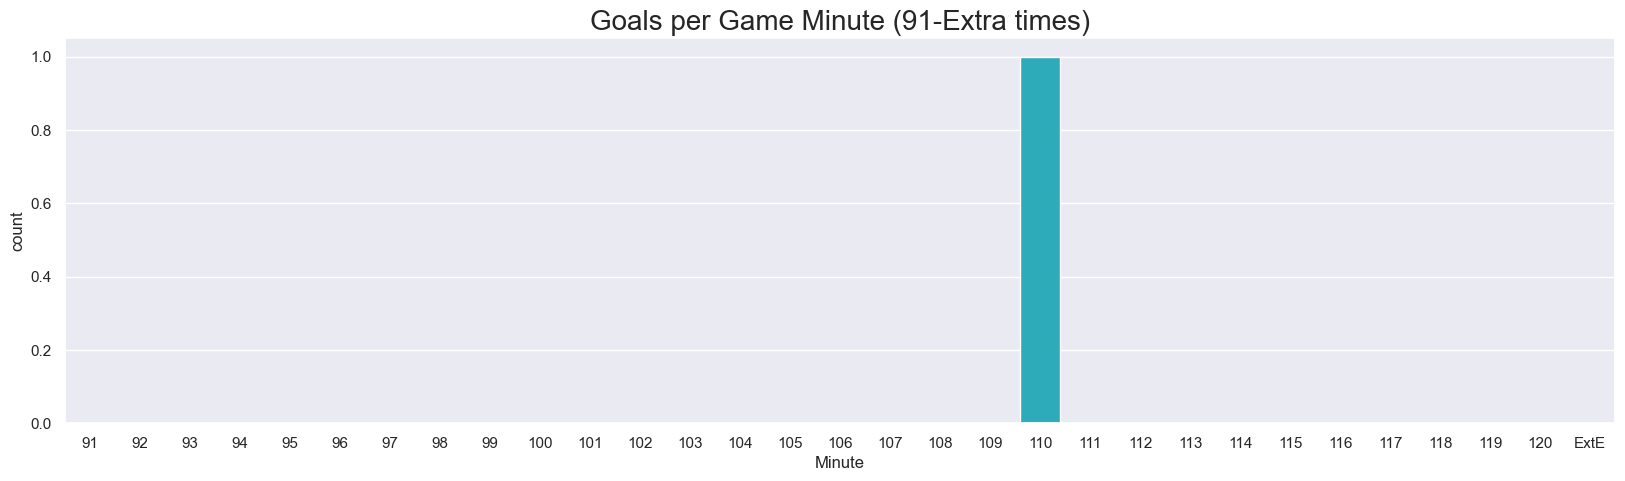

In [21]:
p=sns.countplot(df['Minute'],order=mins3,palette='tab10')
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


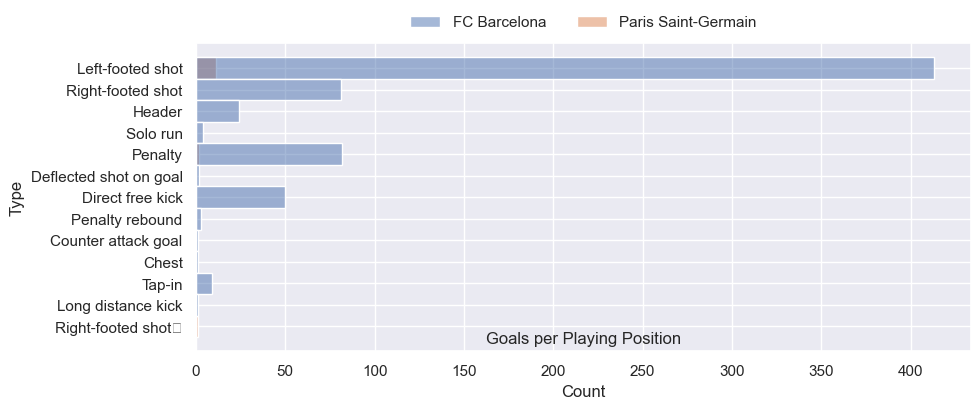

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Playing Position', y=-0.001)
sns.histplot(df,y='Type',hue='Club')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scoresheet after scoring')

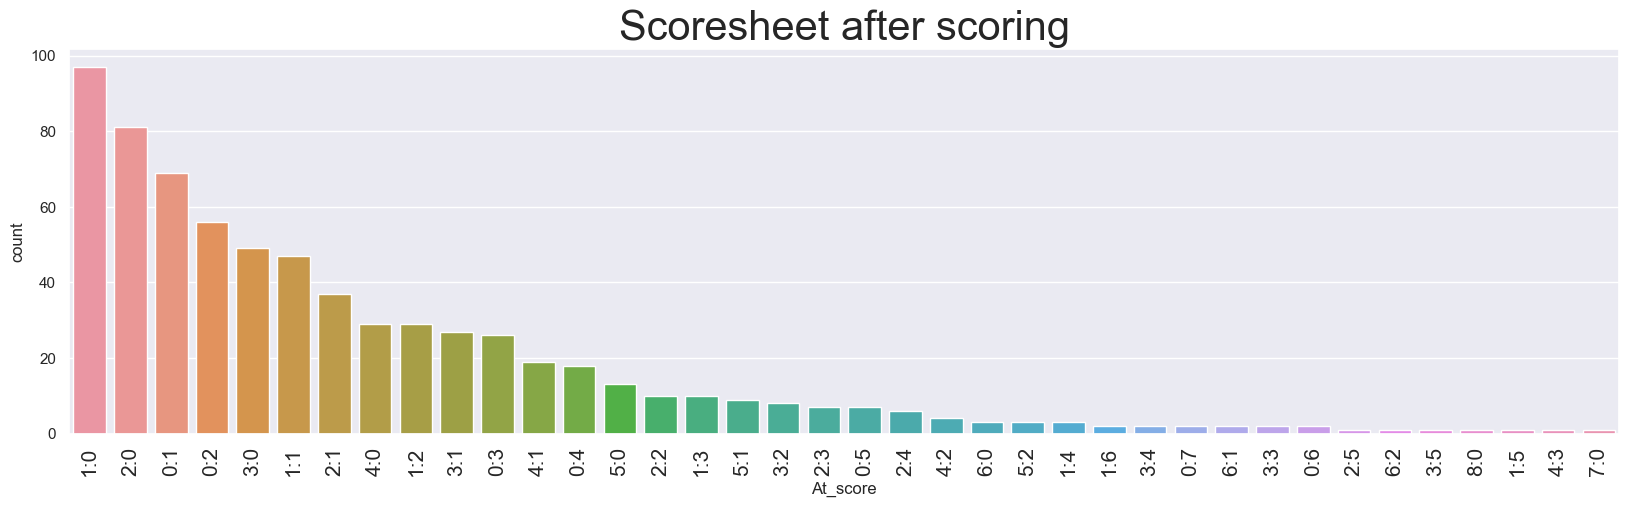

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Goals per Opponent')

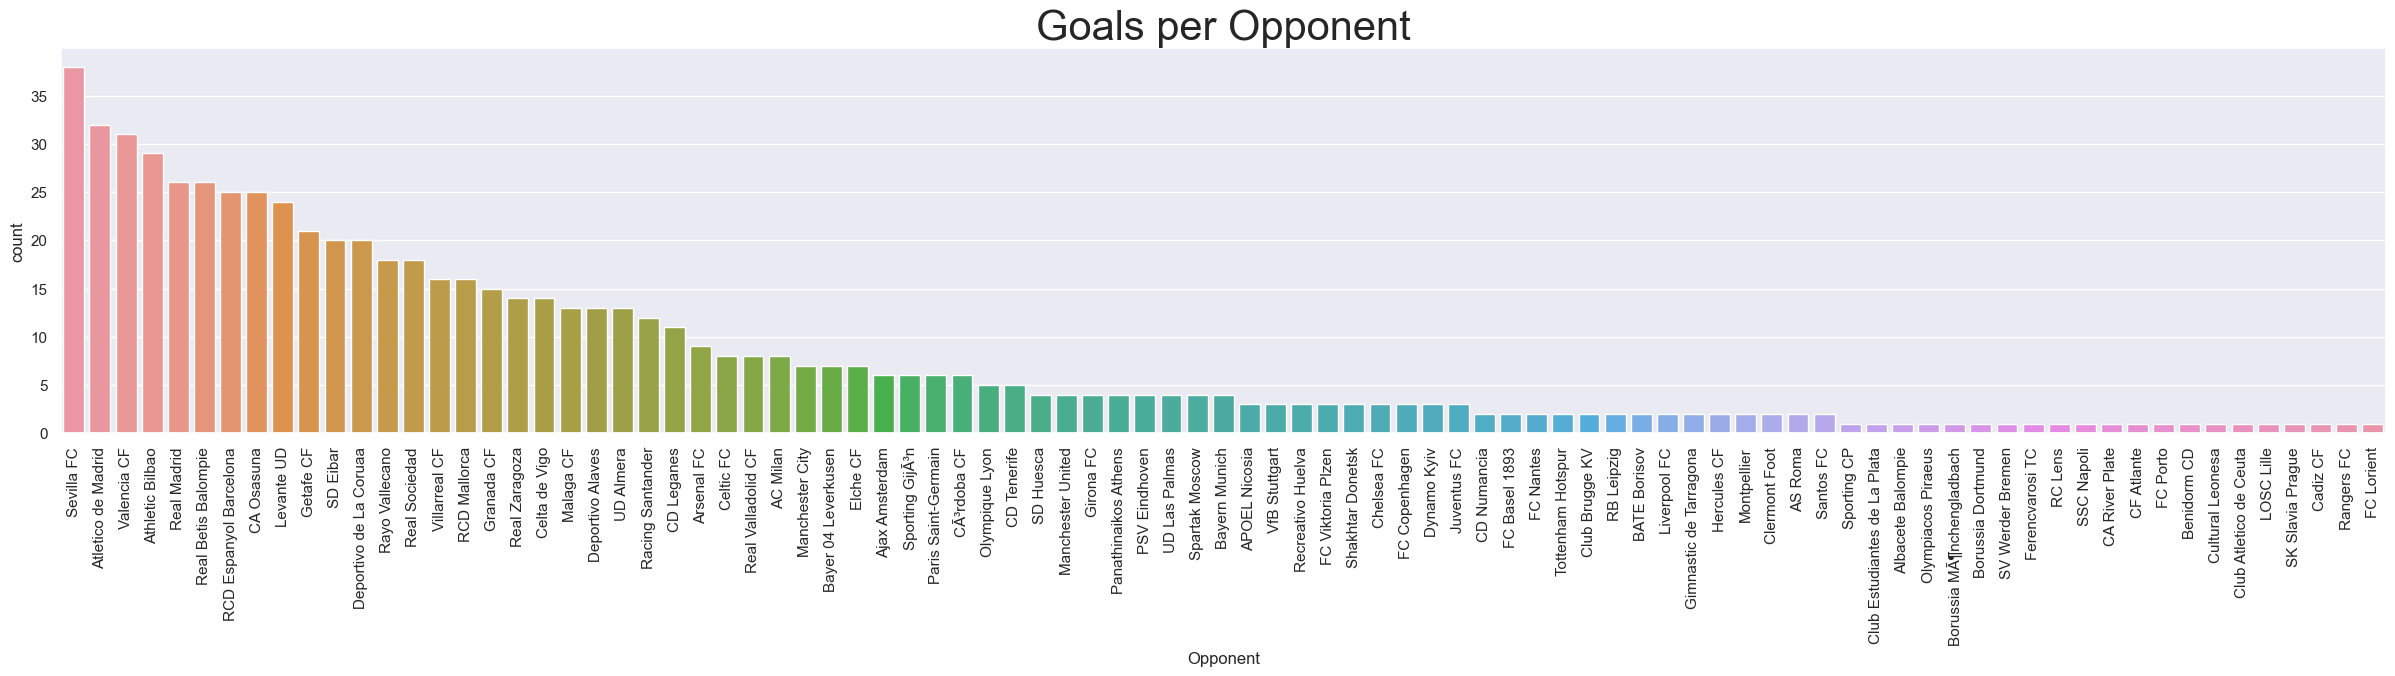

In [25]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)